In [27]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

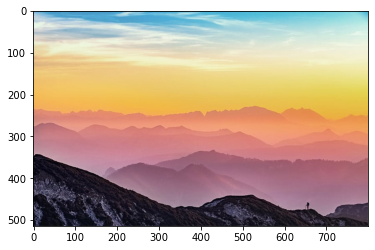

In [28]:
#reading an image
image = cv.imread('sample.jpg')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)

In [29]:
def rgb_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [30]:
def prep_image(raw_img):
    modified_img = cv.resize(raw_img,(900,600),interpolation = cv.INTER_AREA)
    
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1],3)
    
    return modified_img

In [31]:
def color_analysis(img):
    clf = KMeans(n_clusters = 6)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_hex(ordered_colors[i]) for i in counts.keys()]
    
    plt.figure(figsize = (12,8))
    plt.pie(counts.values(),colors = hex_colors)
    
    plt.savefig("Color_analysis.png")
    
    print(hex_colors)

['#76bfd7', '#9e6d82', '#dfe3cb', '#da897c', '#201c29', '#edc666']


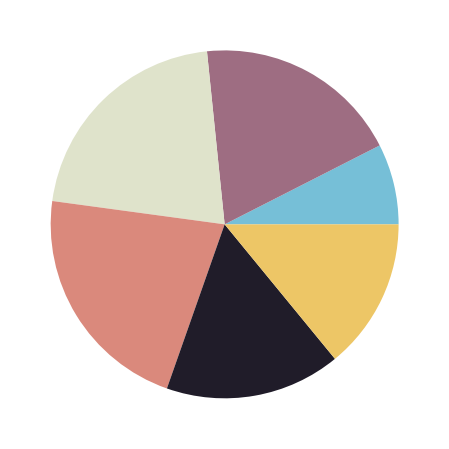

In [32]:
modified_image = prep_image(image)
color_analysis(modified_image)